# Shopping Apps, Rating for Google Play Store and Apple AppStore Users

<img src="https://image.freepik.com/free-vector/cartoon-delivery-man-brings-goods-customer-from-laptop-vector-illustration-concept-with-online-shopping-services_46527-344.jpg" />

## Introduction

Users download apps for various purposes. Given that there is a rise in the usage of online shopping due to the Covid-19 pandemic, improvement of shopping experience has become more important then before. With that in mind, what are the important features we have to look out for to improve a shopping app?

## Problem Statement

- How do the app ratings differ across different shopping apps?
- Is there any specific group of users we can look out for to improve the app?
- Are there any specific improvement we can work on to further improve user experience of the app?

To explore and answer the above questions, we will scrap reviews from Google Play Store and Apple AppStore and conduct analysis and modelling.

## Executive Summary

The data is webscrapped from the Shopping category in Google Play Store and Apple Appstore, 8 apps reviews were chosen for this project (Amazon, Wish, ASOS, Lazada, Ebay, Shoppee, AliExpress, Carousell). The data used was exclusive dated in 2020 only as majority of the data scrapped are from in 2020. Data cleaning was done by removing stopwords, lemmatized and Vectorized to the raw data to create bag-of-words. 

There will be 3 steps to our modelling process, with the first step classifying whether the text is a good or bad review, followed by classifying the reviews into categories created through topic modelling to group them into different subgroups.

A few classification model were used, namely LogisticRegression, MultinomialNB, SGDClassifier, RandomForest, ADABoost. LogisticRegression give us the best results in classifying our data and thus used as the final model. 

As the data set is quite big, RandomizedSearch was used instead of Gridsearch to find the best hyperparameter.



### Content Summary
- Webscrapped reviews of 8 apps from Google Play Store & Apple App Store
- Data Cleaning 
  - Removing data not in year 2020
  - Removing emoji and punctuations
  - Removing non english words
  - Lemmatization
  - Compound score calculation using VaderSentiment
- EDA
  - Plotting distribution of features
  - Topic modelling of good reviews
  - Topic modelling of bad reviews
- Machine Learning Model 
  - LogisticRegression
  - MultinomialNB
  - SGDClassifier
  - RandomForest
  - ADABoost
- Deep Learning Model
  - Convolutional Neural Network
  
### Key Findings
- Most complains are on Bad User Experience, while most good reviews are on the good overall service of the App, which is rather vague
- There is more negative reviews in 9am - 3pm period, and on Tuesdays
- There is quite a number of reviews being 1 word, or otherwise rated wrongly by the user, (e.g. review: Excellent, Rating: 1)
- The multiclass model seems to be predicting better compared to what the topic modeling originally set the topic was, which is quite interesting as the model is able to differentiate the categories clearly base on the keywords.

### Metrics
Using the following metrics to evaluate the models:
- ROC AUC curve(for Binary Classification)
  -  The ROC AUC cruve is able to tell how much model is capable of distinguishing between classes.ranging from 0 to 1, with 1 being perfectly classified.
- MCC Score
  - The Matthews correlation coefficient (MCC), instead, is a more reliable statistical rate which produces a high score only if the prediction obtained good results in all of the four confusion matrix categories (true positives, false negatives, true negatives, and false positives), proportionally both to the size of positive elements and the size of negative elements in the dataset.
- Kappa Score(For multiclassification)
  - Cohen’s Kappa is a quantitative measure of reliability for two raters that are rating the same thing, corrected for how often that the raters may agree by chance. ranging from 0 to 1, with 1 being good.
  
- f1 score weighted
  - The F1 Scores are calculated for each label and then their average is weighted by support - which is the number of true instances for each label. It can result in an F-score that is not between precision and recall

### Final Results
**Classification (Good & Bad Reviews)**
- LogisticRegression
  - Train data AUC: 0.947
  - Test data AUC: 0.945
  - MCC Score: 0.729
  
  
**Multi Classification (Bad Review categories)**
- LogisticRegression
    - Train Data f1 weighted score: 0.867	
    - Test Data f1 weighted score: 0.862	
    - MCC Score: 0.798336	
    - Kappa Score: 0.796888


**Multi Classification (Good Review categories)**
- LogisticRegression
    - Train Data f1 weighted score: 0.937	
    - Test Data f1 weighted score: 0.944	
    - MCC Score: 0.907	
    - Kappa Score: 0.906

### Limitations
- The data set is mostly collected in the month of August and September, which means the model is able to predict this period better, but not in predicting past data. 
- More data could be collected, as there is a major lack of Apple Appstore reviews compared to Google Play Store

### Further research
- Try to use Compound score gathered from VaderSentiment to do the classification instead, as we know there is some misclassified post by users. which hopefully give us a better accuracy.

### Content
1. Webscrap data
2. Data Cleaning
3. EDA
4. Model Part 1, Classification (Good & Bad Reviews)
5. Model Part 2, Multi Classification (Bad Review categories) 
6. Model Part 3, Multi Classification (Good Review categories)
7. Deep Learning Model

# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('pastel')
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
from ipywidgets import widgets

#setting cufflinks to link iplot() method to df
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


from time import time

from PIL import Image
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import re
import spacy
from spacymoji import Emoji
from nltk.corpus import stopwords, words
from nltk import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer as lemmatize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import sys
from pprint import pprint

# Gensim
import gensim, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

import pyLDAvis.gensim

from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer, CorpusFromParsedDocuments, Scalers
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [2]:
df = pd.read_csv('../data/cleaned_reviews.csv')

In [3]:
df.head()

rating                 date      app   store  \
0       5  2020-09-16 20:26:28  shoppee  google   
1       4  2020-09-16 20:13:46  shoppee  google   
2       5  2020-09-16 20:13:05  shoppee  google   
3       4  2020-09-16 20:11:18  shoppee  google   
4       5  2020-09-16 20:08:54  shoppee  google   

                                              review  \
0    Orders mostly came early and products are good.   
1                                Good and convenient   
2                                      Gd...........   
3  My first purchase experience...Happy with purc...   
4                A lot of items at a very good deal.   

                             clean_content               adj  \
0            order come early product good             good    
1                          good convenient  good convenient    
2                                       gd               NaN   
3  purchase experience happy purchase thks      first happy    
4                       lot item good deal             good    

                            noun   verb emoji  neg_score  neu_score  \
0                 order product   come    NaN        0.0      0.707   
1                            NaN    NaN   NaN        0.0      0.408   
2                            NaN    NaN   NaN        0.0      1.000   
3  purchase experience purchase     NaN   NaN        0.0      0.714   
4                 lot item deal     NaN   NaN        0.0      0.715   

   pos_score  compound_score language  
0      0.293          0.4404       en  
1      0.592          0.4404       en  
2      0.000          0.0000       cy  
3      0.286          0.3400       en  
4      0.285          0.4927       en

In [4]:
df.shape

(78929, 15)

## Removing null values

In [5]:
df.isna().sum()[df.isna().sum() != 0]

clean_content     1267
adj              18153
noun             25517
verb             35816
emoji            73151
dtype: int64

In [6]:
df= df[df['clean_content'].notna()]
df.reset_index(inplace = True, drop = True)

In [7]:
df.isna().sum()[df.isna().sum() != 0]

adj      16916
noun     24273
verb     34617
emoji    72856
dtype: int64

In [8]:
print(f'Number of rows entry in data: {df.shape[0]}')

Number of rows entry in data: 77662


In [9]:
df.notna().sum()[df.notna().sum() != df.shape[0]]

adj      60746
noun     53389
verb     43045
emoji     4806
dtype: int64

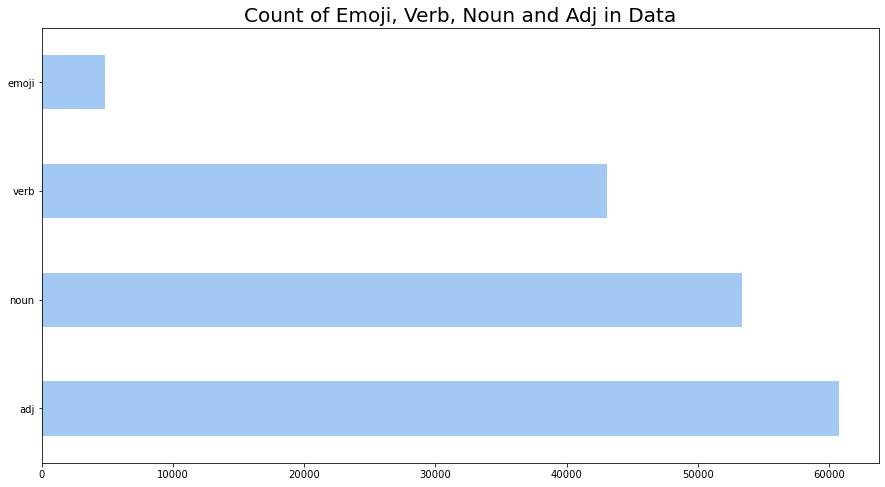

In [10]:
plt.figure(figsize = (15, 8))
plt.title('Count of Emoji, Verb, Noun and Adj in Data', fontsize = 20)
df.notna().sum()[df.notna().sum() != df.shape[0]].plot(kind = 'barh');

**Remarks**
- There is very little reviews that uses Emoji, which means we cannot rely heavily on emojis to do the prediction.

## Check for non English Languages

In [11]:
df = df[df['language'] == 'en']
df.shape

(58047, 15)

In [12]:
# Sorting out categories that are considered english language
english_list = ['en']

for i in df.index:
    if df['language'][i] not in english_list:
        df.drop(index = i, inplace = True)

print(f'Number of rows that are considered English: {df.shape[0]}')

Number of rows that are considered English: 58047


## Checking rating and compound score mismatched

In [13]:
#Checking bad ratings with high positive scores
df_bad_mis = df[df['rating'] <=3][df['pos_score'] > 0.4][['rating', 'pos_score', 'review']]
print(f'Total rows of wrong rated bad ratings: {df_bad_mis.shape[0]}')
df_bad_mis.head(10)

Total rows of wrong rated bad ratings: 402


rating  pos_score                                             review
1057       3      0.672                          Great shopping experience
1518       2      0.534  great improvement no more freeze!!! but hope i...
1657       3      0.420             Slow,in receiving.but good in service.
1762       1      0.477               Candy game crash. Please fix. Thanks
2509       1      0.744                                       Good quality
2892       1      0.457  Price increase, have some nice games but poor ...
3193       3      0.608                  Good to have fun online shopping.
3485       1      0.583                                 Love buy in shopee
3556       3      0.435        Thank u shopee i recieve the gift from you.
4158       3      0.744                                    Good experience

In [14]:
# Removing wrongly rated reviews
df.drop(index = df_bad_mis.index, inplace = True)
df.shape

(57645, 15)

In [15]:
#Checking Good ratings with high negative scores
df_good_mis = df[df['rating'] > 3][df['neg_score'] > 0.4][['rating', 'neg_score', 'review']]
print(f'Total rows of wrong rated good ratings: {df_good_mis.shape[0]}')
df_good_mis.head(10)

Total rows of wrong rated good ratings: 159


rating  neg_score                                             review
1447       5      0.403                       Sometime don't get free coin
2062       4      0.505  Returning the faulty products r very difficult...
3078       5      0.688                                         No issues.
4167       5      0.556                              Lags sometimes though
4574       5      0.423                                 Fast and no hassle
5139       5      0.412                           Low price. Fast delivery
5195       5      0.688                                       Lower price.
6111       4      0.608                              Disappointed at time.
7440       5      0.423                           Faster with lower prices
7746       4      0.655                                 Delivery delayed..

In [16]:
# Removing wrongly rated reviews
df.drop(index = df_good_mis.index, inplace = True)
print(f'Number of rows left: {df.shape[0]}')

Number of rows left: 57486


**Remarks**
- Removed all the reviews that can be considered positive but was rated badly by user, as it will make it difficult for the model to predict later

## Changing Date Data to datetime dtype

In [17]:
df['date'] = df['date'].astype('datetime64')

## Creating new columns for eda

### New time columns

In [18]:
df['month'] = df.date.dt.month
df['dayofweek'] = df.date.dt.dayofweek + 1 #adding 1 as the data starts from 0 for monday, this is to avoid confusion
df['hour'] = df.date.dt.hour
df['minute'] = df.date.dt.minute

### Length of text columns

In [19]:
df['text_len'] = df['review'].str.len()
df['word_count'] = df['review'].str.split().str.len()

# EDA

## Distribution of App, Rating, Store, Month and DayofWeek

In [20]:
def plot_countplots(df, features):
    nrows = int(np.ceil(len(features)/2))
    fig, ax = plt.subplots(nrows, 2, figsize=(18,6*nrows))
    ax = ax.ravel()
    for i in range(len(features)):
        ax[i].set_title(f'Count of {features[i]} across Shopping reviews', fontdict = {'fontsize': 10})
        sns.countplot(x = features[i], data = df, ax = ax[i]);

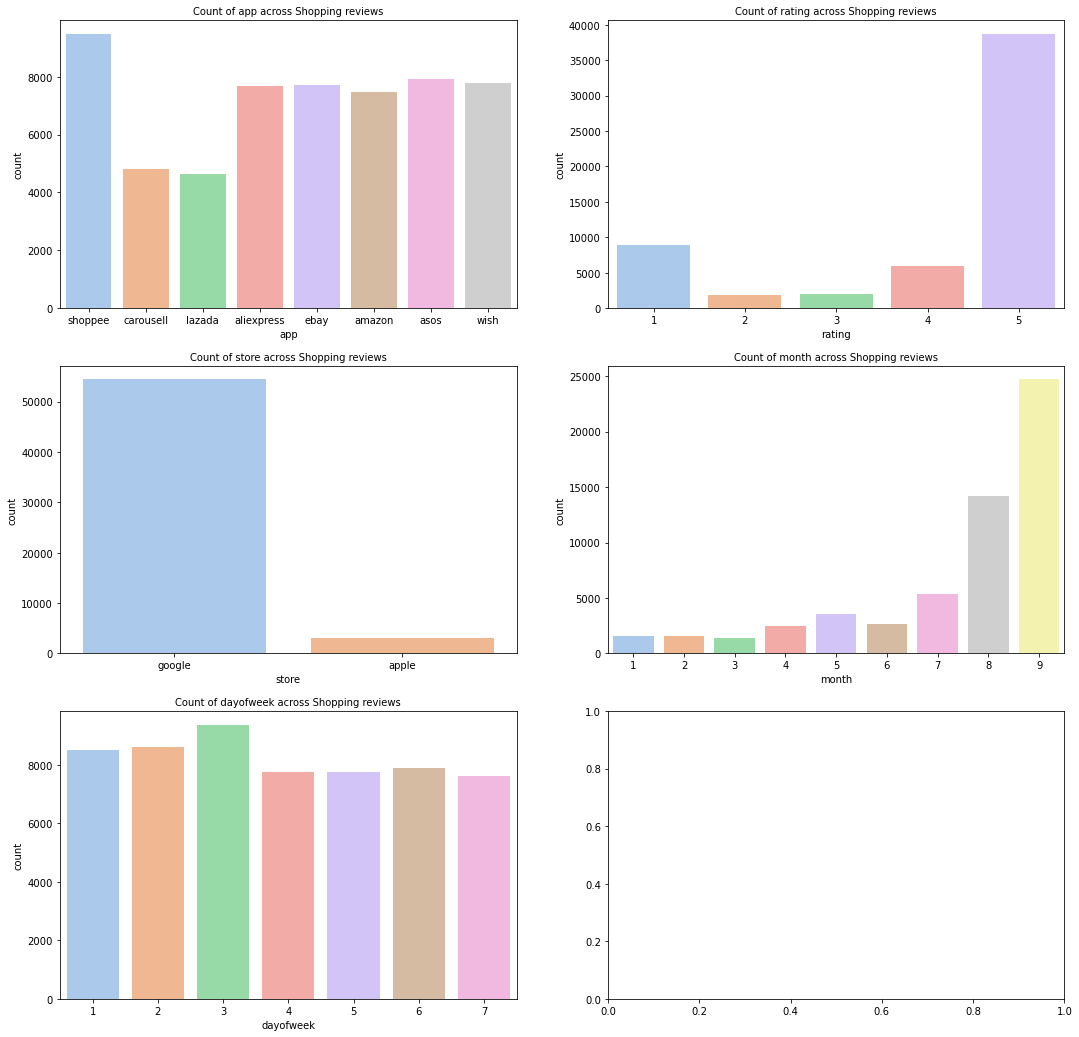

In [21]:
plot_countplots(df, ['app', 'rating', 'store', 'month', 'dayofweek'])

**Remarks**
- There is a imbalance data in the ratings, with significantly more positive reviews as compared to negative reviews
- There is more reviews data in the September month as compared to the earlier period, which is due to the data collection period
- Interestingly, there is more reviews on Wednesday as compared to other days

## Boxplot of App across Month

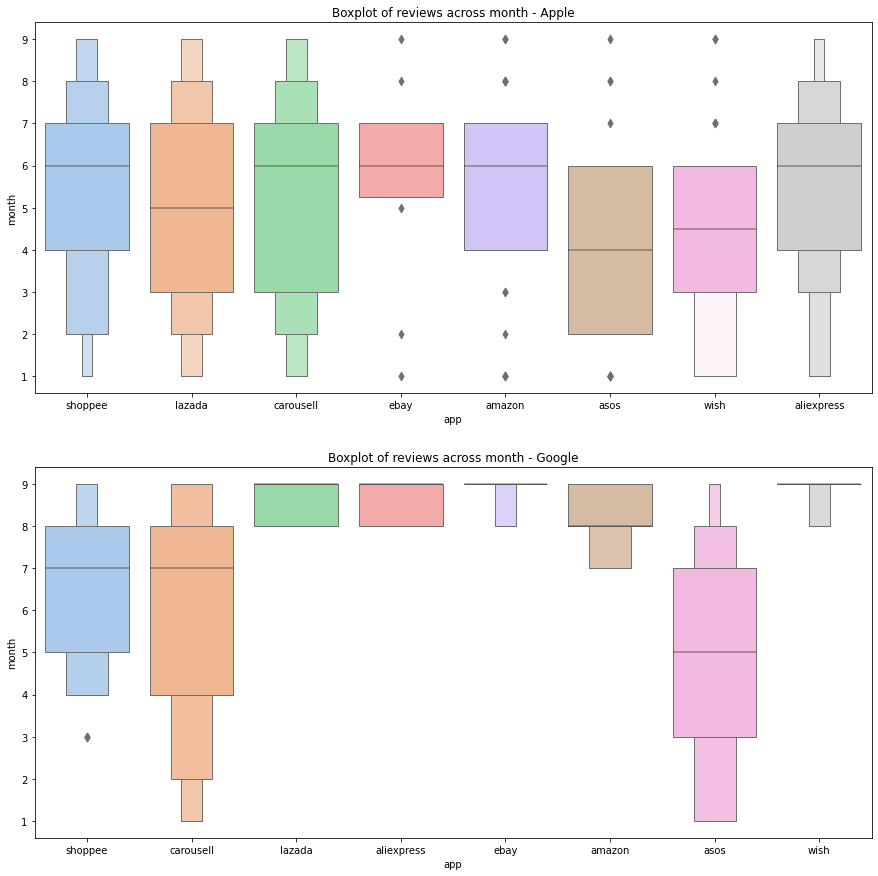

In [22]:
fig,ax = plt.subplots(2,1, figsize = (15, 15))
ax[0].set_title('Boxplot of reviews across month - Apple')
sns.boxenplot(x = 'app', y = 'month', data = df[df['store'] == 'apple'], ax = ax[0])

ax[1].set_title('Boxplot of reviews across month - Google')
sns.boxenplot(x = 'app', y = 'month', data = df[df['store'] == 'google'], ax = ax[1]);

**Remarks**
- The data collected is more spread across the time period in Apple Appstore as compared to Google Playstore

## TimeSeries Analysis of Data

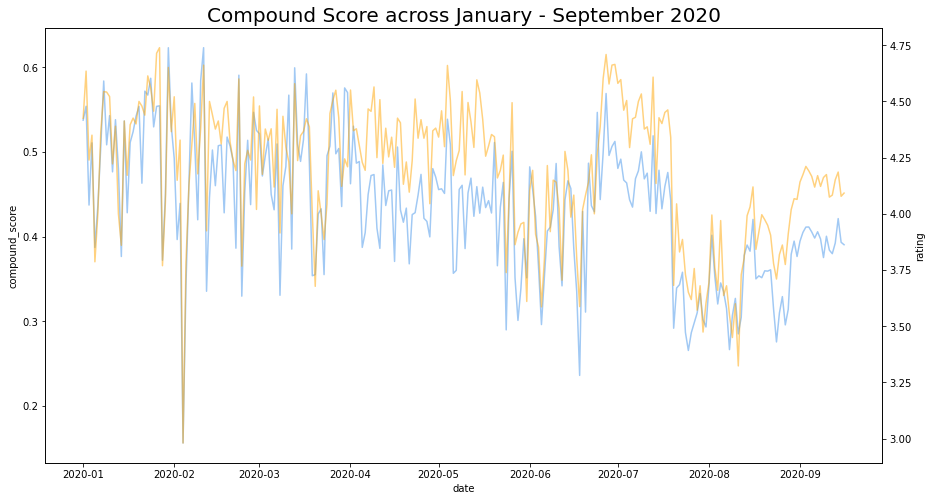

In [23]:
plt.figure(figsize = (15,8))
plt.title('Compound Score across January - September 2020', fontsize = 20)
ax = sns.lineplot(x = 'date' , y = 'compound_score', data = df.resample('D', on = 'date').mean())
g2 = ax.twinx()
sns.lineplot(x = 'date' , y = 'rating', data = df.resample('D', on = 'date').mean(), ax = g2, color = 'orange', alpha = 0.5);

**Remarks**
- The compound score from VaderSentiment and ratings are closely similar, therefore will use compound score for certain visualisation

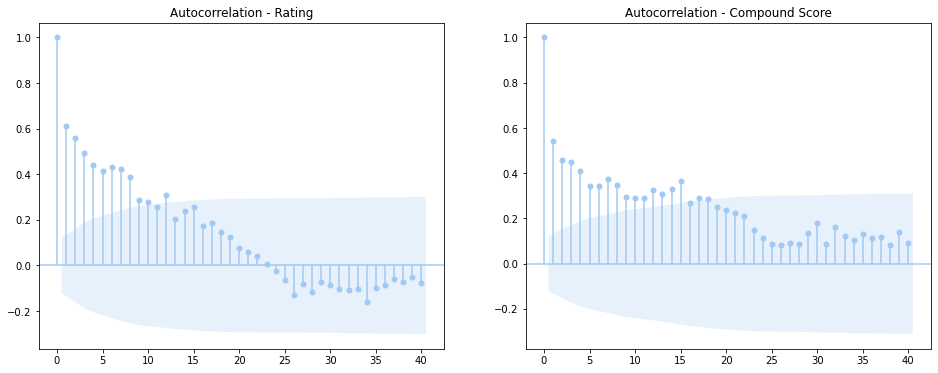

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_acf(df.resample('D', on = 'date').mean()['rating'], lags = 40, ax = ax[0], title = 'Autocorrelation - Rating')
plot_acf(df.resample('D', on = 'date').mean()['compound_score'], lags = 40, ax = ax[1], title = 'Autocorrelation - Compound Score');

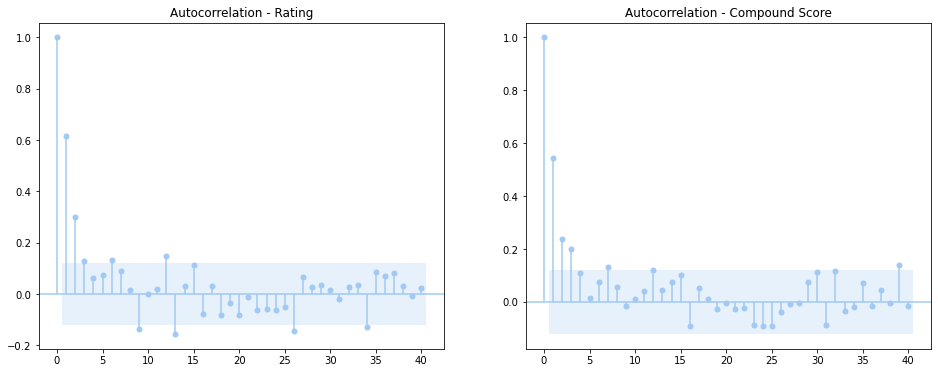

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
plot_pacf(df.resample('D', on = 'date').mean()['rating'], lags = 40, ax = ax[0], title = 'Autocorrelation - Rating')
plot_pacf(df.resample('D', on = 'date').mean()['compound_score'], lags = 40, ax = ax[1], title = 'Autocorrelation - Compound Score');

**Remarks**
- from the plots above, it can be interpreted that there is a seasonality of 1 week(7days), and around 1 month(26, 28 days)

## Distribution by Hour, DayofWeek

In [26]:
def plot_countplots_time(df, date_features, scoring):
    nrows = int(np.ceil(len(date_features)))
    fig,ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    
    for i in range(len(date_features)):
        ax[i].set_title(f'Count of {date_features[i]} across Shopping reviews {scoring}', fontdict = {'fontsize': 20})
        g = sns.countplot(x = date_features[i] , data = df, ax=ax[i])
        g2 = g.twinx()
        
        g2 = sns.pointplot(x = date_features[i],
                           y = scoring, 
                           data = df ,
                           ax=g2, color = 'black')
        
        plt.legend(labels = [f'{scoring} mean'])
    plt.show()

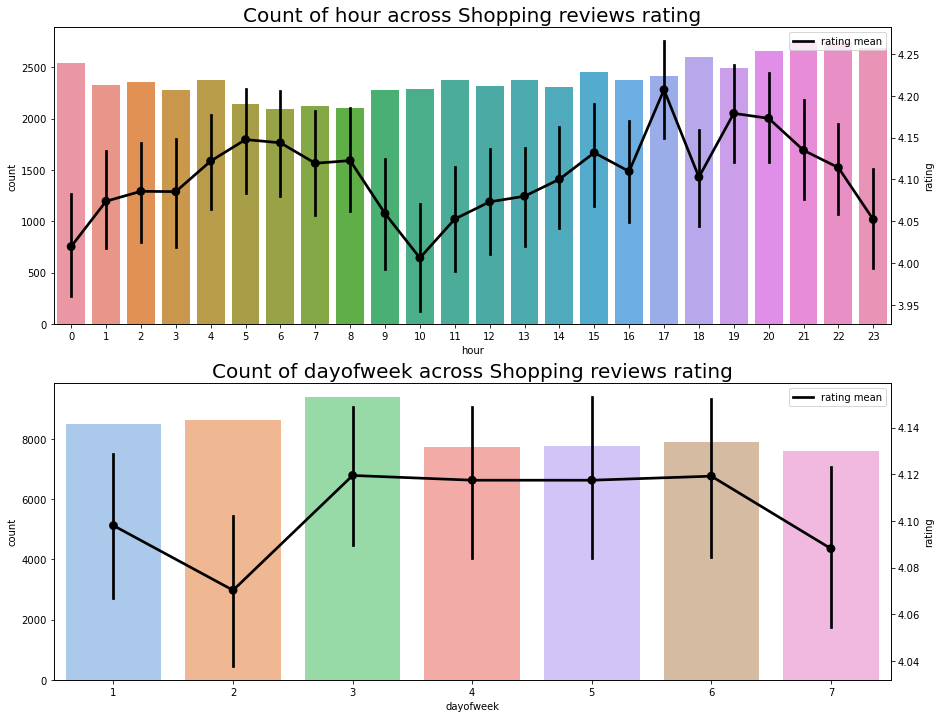

In [27]:
plot_countplots_time(df, ['hour', 'dayofweek'], 'rating')

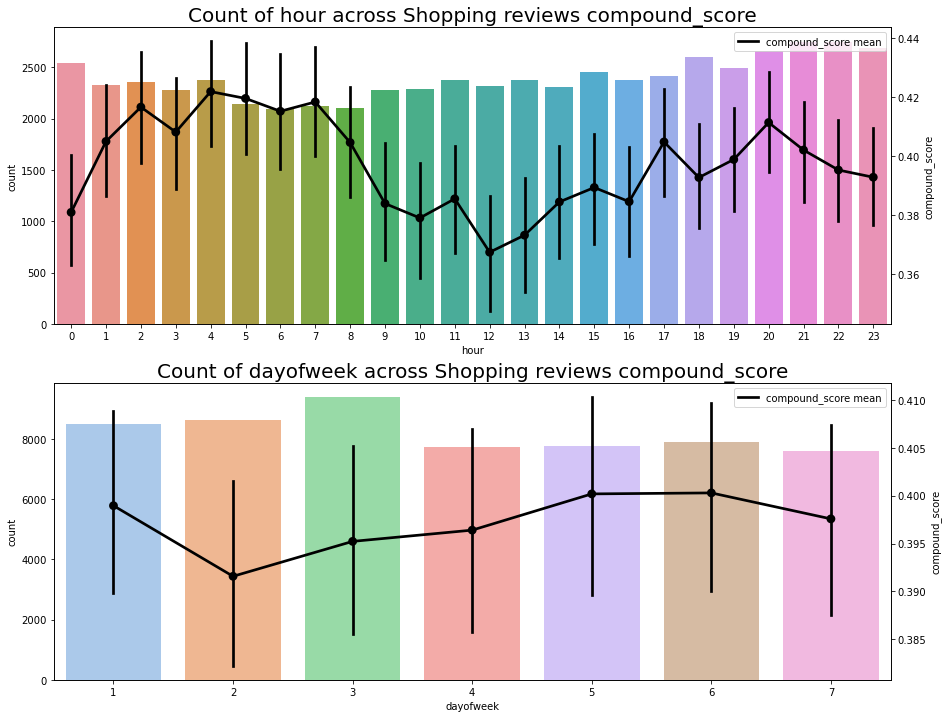

In [28]:
plot_countplots_time(df, ['hour', 'dayofweek'], 'compound_score')

**Remarks**
- More negative reviews are seen in 9am - 3pm period
- More negative reviews on Tuesdays

## Distribution of Wordlen, Wordcount

In [29]:
def dist_plotting(features):
    nrows = len(features)
    fig, ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    plt.subplots_adjust(hspace = 0.2)
    
    for i in range(len(features)):
        ax[i].set_title(f'Distribution of {features[i]} of reviews')
        sns.histplot(data = df[df['rating'] > 3], x = features[i], color = 'b', ax = ax[i], label = 'good_review')
        sns.histplot(data = df[df['rating'] <= 3], x = features[i], alpha = 0.7, ax = ax[i], color = 'r', label = 'bad_review')
        ax[i].set_xlim([0,df[features[i]].quantile(q = 0.99)])
        ax[i].legend()

Average text length of good reviews: 63
Average text length of bad reviews: 178
Average word count of good reviews: 12
Average word count of bad reviews: 33


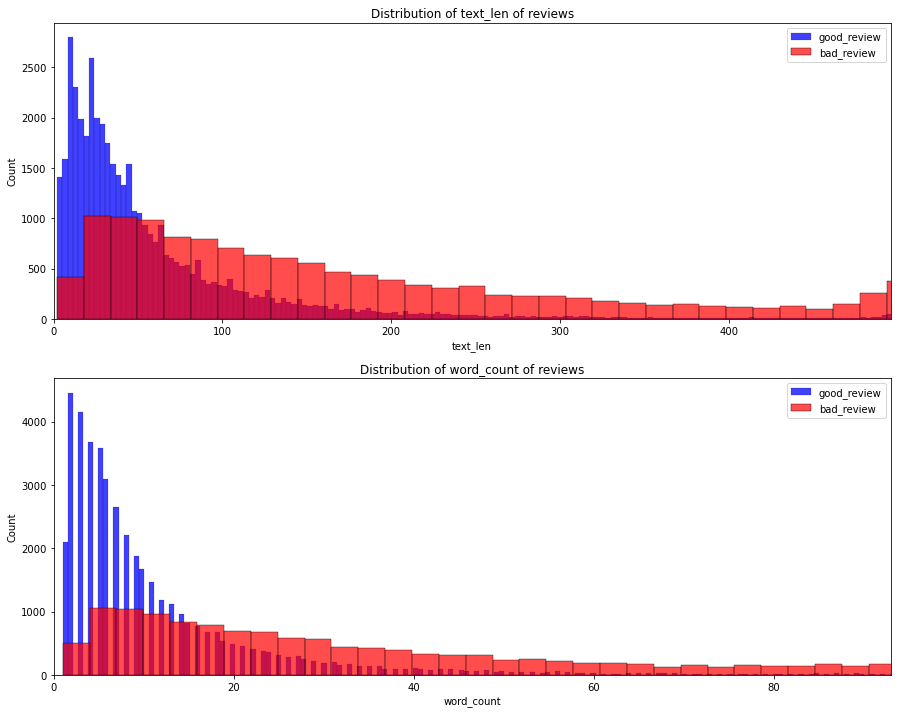

In [30]:
print(f'Average text length of good reviews: {round(df.text_len[df.rating > 3].mean())}')
print(f'Average text length of bad reviews: {round(df.text_len[df.rating <= 3].mean())}')
print(f'Average word count of good reviews: {round(df.word_count[df.rating > 3].mean())}')
print(f'Average word count of bad reviews: {round(df.word_count[df.rating <= 3].mean())}')

dist_plotting(['text_len', 'word_count'])

**Remarks**
- Bad reviews tend to have more word count as compared to good reviews

## Distribution of Adj, Noun, Verb and Emoji

In [31]:
def dist_plotting_word(features):
    nrows = len(features)
    fig, ax = plt.subplots(nrows,1, figsize = (15, 5*nrows))
    plt.subplots_adjust(hspace = 0.4)
    
    for i in range(len(features)):
        ax[i].set_title(f'Distribution of {features[i]} of reviews')
        sns.histplot(data = df[df['rating'] > 3], x = round(df[df['rating'] > 3][features[i]].str.len()), color = 'b', ax = ax[i], label = 'good_review')
        sns.histplot(data = df[df['rating'] <= 3], x = round(df[df['rating'] <= 3][features[i]].str.len()), alpha = 0.7, ax = ax[i], color = 'r', label = 'bad_review')
        ax[i].set_xlim([0,round(df[df['rating'] > 3][features[i]].str.len()).quantile(q = 0.99)])
        ax[i].legend()

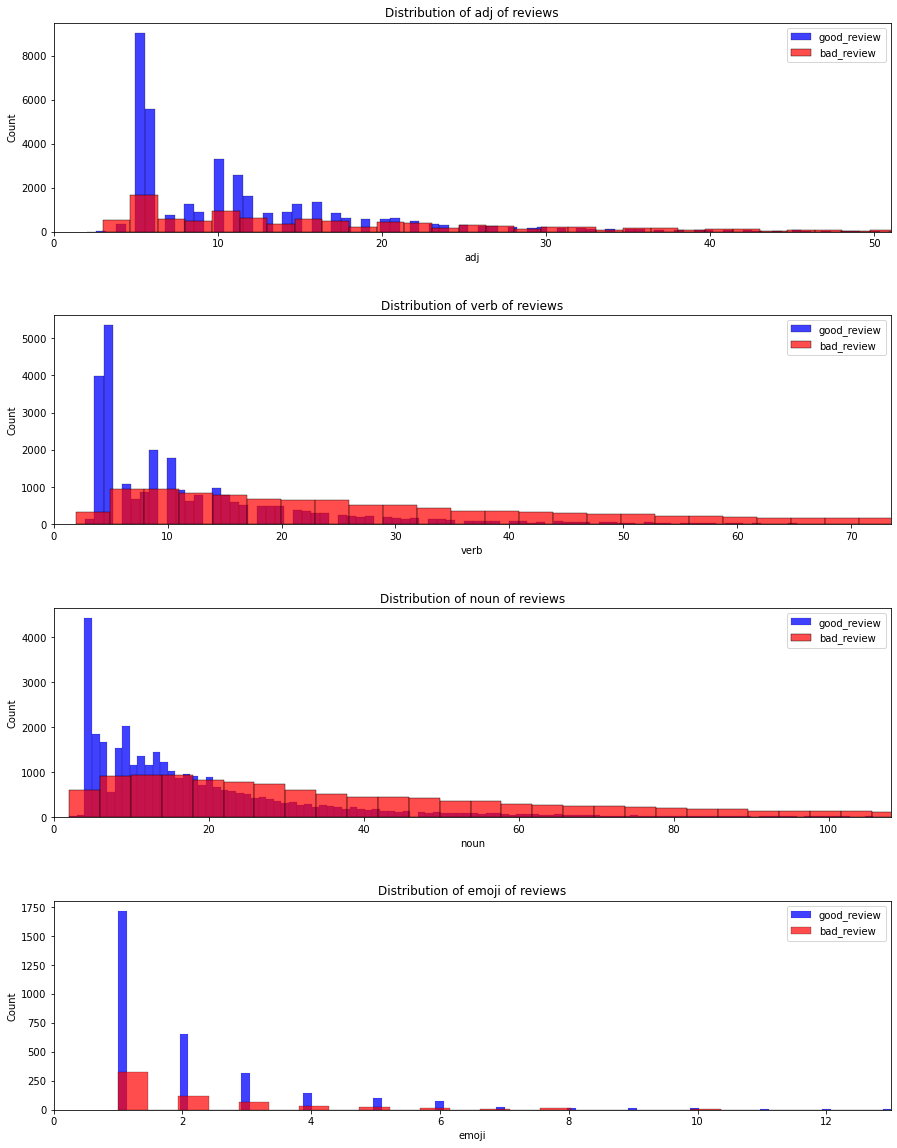

In [32]:
dist_plotting_word(['adj', 'verb', 'noun', 'emoji'])

## Boxplot of Rating across apps

In [33]:
def boxplot_interact(scoring):
    
    y0 = df.loc[df['app'] == 'shoppee'][scoring]
    y1 = df.loc[df['app'] == 'carousell'][scoring]
    y2 = df.loc[df['app'] == 'lazada'][scoring]
    y3 = df.loc[df['app'] == 'aliexpress'][scoring]
    y4 = df.loc[df['app'] == 'ebay'][scoring]
    y5 = df.loc[df['app'] == 'amazon'][scoring]
    y6 = df.loc[df['app'] == 'asos'][scoring]
    y7 = df.loc[df['app'] == 'wish'][scoring]
    
    trace0 = go.Box(y=y0,name = 'shoppee',marker = dict(color = 'rgb(214, 12, 140)',))
    trace1 = go.Box(y=y1,name = 'carousell',marker = dict(color = 'rgb(0, 128, 128)',))
    trace2 = go.Box(y=y2,name = 'lazada',marker = dict(color = 'rgb(10, 140, 208)',))
    trace3 = go.Box(y=y3,name = 'aliexpress',marker = dict(color = 'rgb(12, 102, 14)',))
    trace4 = go.Box(y=y4,name = 'ebay',marker = dict(color = 'rgb(10, 0, 100)',))
    trace5 = go.Box(y=y5,name = 'amazon', marker = dict(color = 'rgb(100, 0, 10)',))
    trace6 = go.Box(y=y6,name = 'asos',marker = dict(color = 'rgb(255, 212, 59)',))
    trace7 = go.Box(y=y7,name = 'wish',marker = dict(color = 'rgb(100, 100, 100)',))
    
    data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7]
    
    layout = go.Layout(title = f"Sentiment {scoring} Boxplot of app")
                    
    fig = go.Figure(data=data,layout=layout)
    fig.update_layout(autosize=False,width=1000,height=500,
                      margin=dict(l=50,r=50,b=100,t=100,pad=4),paper_bgcolor="white")
    
    iplot(fig, filename = f'Sentiment {scoring} Boxplot of app', image_width=600, image_height=400,)

In [34]:
boxplot_interact('rating')

## Boxplot of Compound score across apps

In [35]:
boxplot_interact('compound_score')

**Remarks**
- Amazon app seems to have quite a fair bit of ratings across 1-5, followed by Carousell, then Lazada.
- Shoppee and Ebay have more positive review by looking at the compound score

## Distribution of Keywords

In [36]:
def get_top_n_words(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer().fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

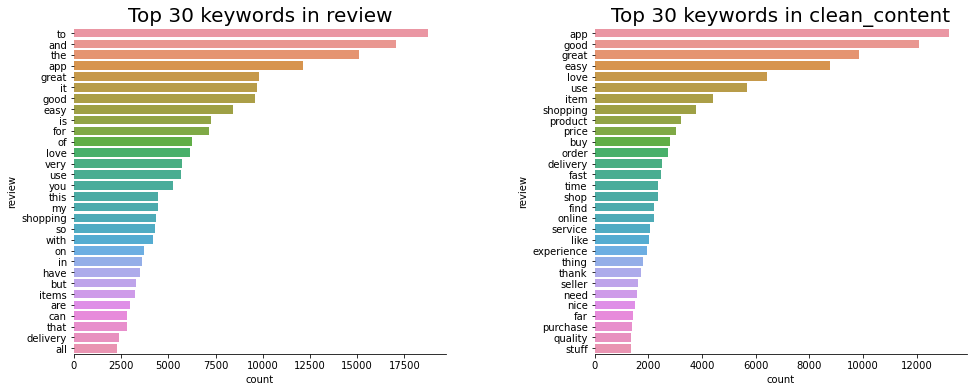

In [37]:
get_top_n_words(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

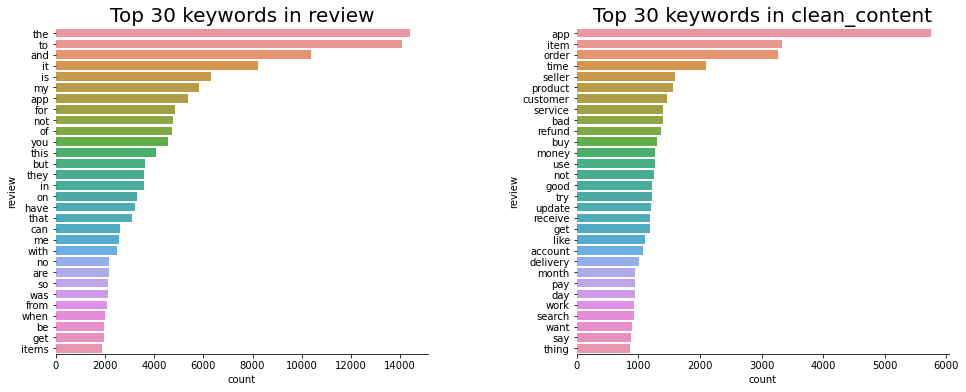

In [38]:
get_top_n_words(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- Keywords in the top chart are good, great,easy, use
- keywords in the bad reviews top chart are time, order, service

## Distribution of Bigram Keywords

In [39]:
def get_top_n_bigrams(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer(ngram_range=(2, 2)).fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} Bigrams keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

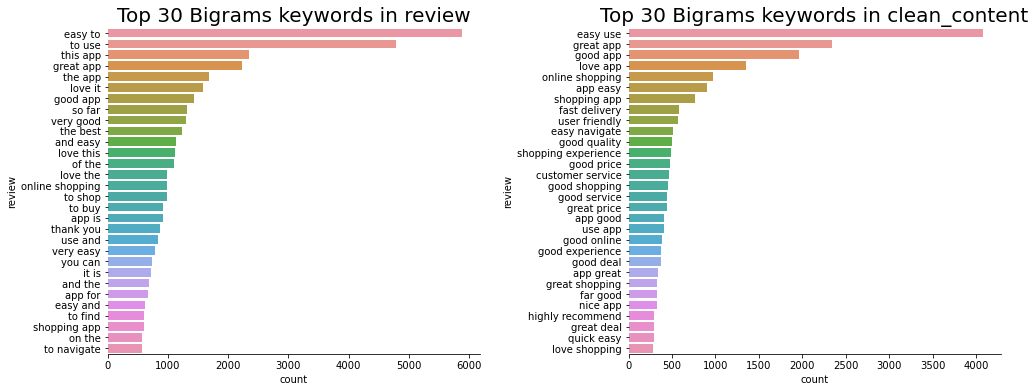

In [40]:
get_top_n_bigrams(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

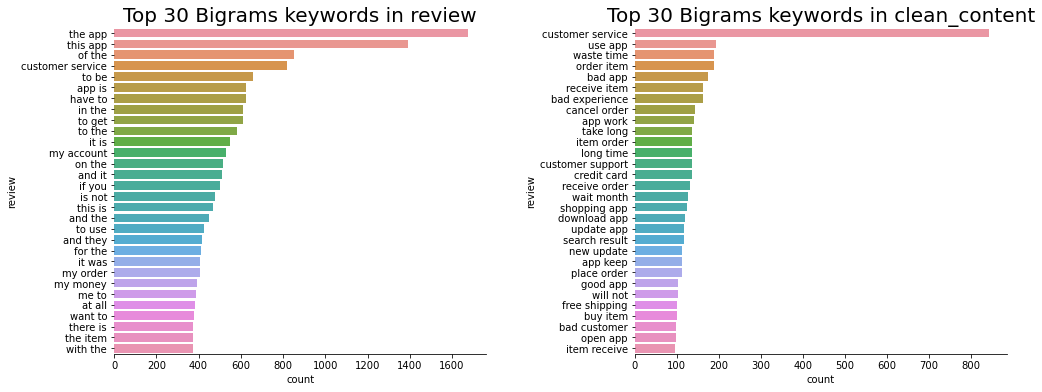

In [41]:
get_top_n_bigrams(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- looking at the bigrams, Customer service seems to be very important factor in giving a bad review
- whereas 'Easy Use' came up as top for good review, which need further reasearch to see what it means

## Distribution of Trigram Keywords

In [42]:
def get_top_n_trigrams(df, corpus, n=None):
    
    fig, ax = plt.subplots(1,len(corpus), figsize = (8*len(corpus), 6))
    plt.subplots_adjust(wspace = 0.4)
    
    for i in range(len(corpus)):
        vec = CountVectorizer(ngram_range=(3, 3)).fit(df[corpus[i]])
        bag_of_words = vec.transform(df[corpus[i]])
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        
        count_df = pd.DataFrame(words_freq[:n], columns = ['review' , 'count'])
        ax[i].set_title(f'Top {n} Trigram keywords in {corpus[i]}',fontdict = {'fontsize': 20})
        sns.barplot(data = count_df, x = 'count', y = 'review', ax= ax[i])
        sns.despine(left = True, bottom = False, ax = ax[i]);

### Good Reviews

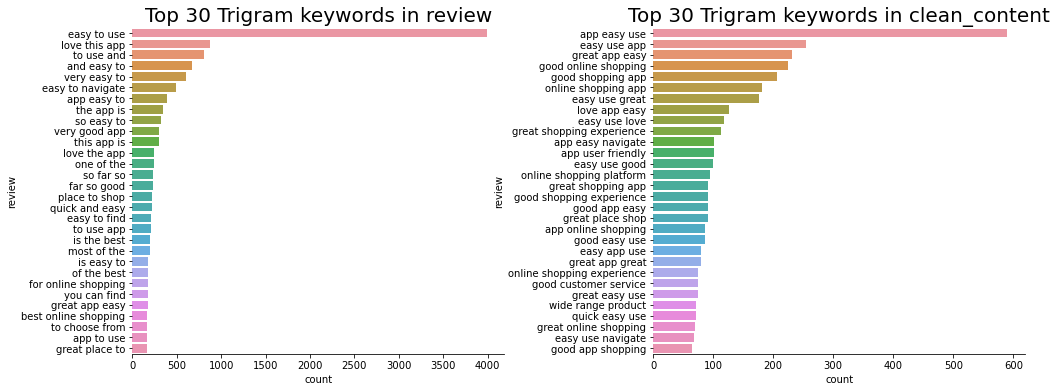

In [43]:
get_top_n_trigrams(df[df['rating'] > 3], ['review', 'clean_content'], 30)

### Bad Reviews

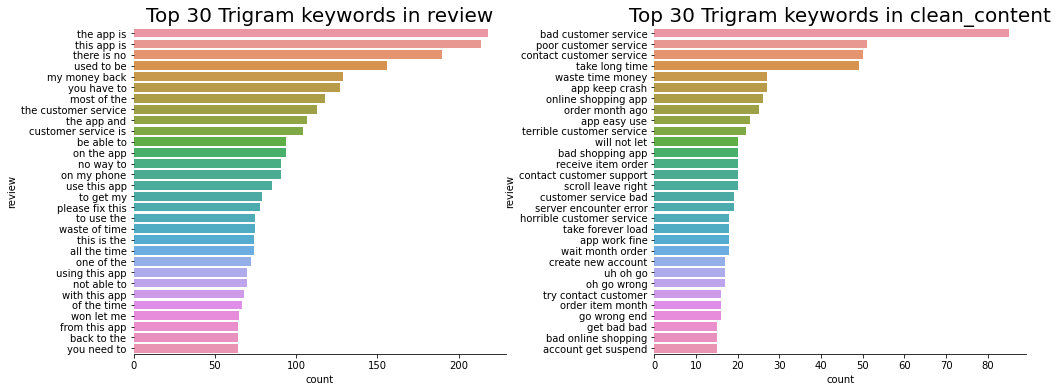

In [44]:
get_top_n_trigrams(df[df['rating'] <= 3], ['review', 'clean_content'], 30)

**Remarks**
- Similar to the bigrams plot, Customer Service and Easy use seems to be at the top 

## Extra: Interactive plot of ratings

In [45]:
month = widgets.IntSlider(value=1.0,min=1.0,max=9.0,step=1.0,
                          description='Month:',continuous_update=False)

use_date = widgets.Checkbox(description='Date: ',value=True,)

container = widgets.HBox(children=[use_date, month])

store = widgets.Dropdown(description='Store:   ',value='apple',
                         options=df['store'].unique().tolist())

app = widgets.Dropdown(options=list(df['app'].unique()),
                       value='shoppee',description='App:',)


goodrtrace = go.Histogram(x=df[df['rating'] > 3]['rating'], opacity=0.75, name='Good reviews')
badrtrace = go.Histogram(x=df[df['rating'] <= 3]['rating'], opacity=0.75, name='Bad reviews')
inter = go.FigureWidget(data=[goodrtrace, badrtrace],
                    layout=go.Layout(
                        title=dict(
                            text='Apps Ratings'
                        ),
                        barmode='overlay'
                    ))
inter.update_layout(autosize=False,width=1000,height=500,
                margin=dict(l=50,r=50, b=100,t=100,pad=4),
                paper_bgcolor="white",);

In [46]:
def validate():
    if app.value in df['app'].unique() and store.value in df['store'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['store'] == store.value,
                               df['app'] == app.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['store'] == 'apple', df['app'] == app.value)]
            temp_df = df[filter_list]
        x1 = temp_df[temp_df['rating'] > 3]['rating']
        x2 = temp_df[temp_df['rating'] <= 3]['rating']
        with inter.batch_update():
            inter.data[0].x = x1
            inter.data[1].x = x2
            inter.layout.barmode = 'overlay'
            inter.layout.xaxis.title = 'Ratings'
            inter.layout.yaxis.title = 'Number of Reviews'


app.observe(response, names="value")
store.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [47]:
container2 = widgets.HBox([app, store])
display(widgets.VBox([container,container2,inter]))

# Topic Modeling for above average ratings (4, 5 ratings )

## Converting to list

In [48]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df[df['rating'] > 3].clean_content.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['order', 'come', 'early', 'product', 'good']]


In [49]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words],min_count = 3, threshold=5)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['order_come_early', 'product', 'good']


In [50]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [51]:
# Form Bigrams and Trigrams
data_words_bigrams = make_bigrams(data_words)
data_words_trigrams= make_trigrams(data_words_bigrams)
data_words_trigrams[0]

['order_come_early', 'product', 'good']

## LDA Modelling

In [52]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10, 
                                            random_state=42,
                                            chunksize = 10000,
                                            iterations=50,
                                            passes = 10,
                                            decay = 0.5,
                                            alpha = 'asymmetric')

pprint(lda_model.print_topics())

[(0,
  '0.176*"good" + 0.102*"app" + 0.080*"love" + 0.072*"shopping" + '
  '0.040*"online" + 0.036*"experience" + 0.035*"service" + 0.020*"far" + '
  '0.018*"fast" + 0.017*"product"'),
 (1,
  '0.231*"easy" + 0.225*"great" + 0.150*"use" + 0.123*"app" + 0.023*"love" + '
  '0.021*"quick" + 0.019*"navigate" + 0.013*"simple" + 0.013*"fast" + '
  '0.012*"deal"'),
 (2,
  '0.063*"lot" + 0.043*"well" + 0.036*"product" + 0.029*"variety" + '
  '0.023*"choice" + 0.022*"offer" + 0.019*"useful" + 0.019*"deal" + '
  '0.019*"discount" + 0.018*"range"'),
 (3,
  '0.095*"app" + 0.076*"nice" + 0.067*"work" + 0.062*"awesome" + 0.053*"user" '
  '+ 0.043*"friendly" + 0.027*"amazing" + 0.026*"perfect" + 0.018*"problem" + '
  '0.015*"issue"'),
 (4,
  '0.099*"price" + 0.079*"buy" + 0.078*"great" + 0.053*"stuff" + 0.048*"shop" '
  '+ 0.044*"love" + 0.043*"good" + 0.036*"item" + 0.034*"thing" + '
  '0.032*"cheap"'),
 (5,
  '0.092*"order" + 0.073*"time" + 0.056*"item" + 0.041*"delivery" + '
  '0.032*"good" + 0.027

## Categorizing sorted data

In [53]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num),
                                                                  round(prop_topic,4),
                                                                  topic_keywords]), 
                                                       ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_positive_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_positive_topic = df_topic_positive_keywords.reset_index()
df_positive_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_positive_topic['Document_No'] = df[df['rating'] > 3].index
df_positive_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             5.0              0.8448   
1            1             0.0              0.7340   
2            3             6.0              0.3954   
3            4             2.0              0.3995   
4            5             5.0              0.6914   
5            7             5.0              0.6579   
6            8             4.0              0.5225   
7            9             0.0              0.7345   
8           10             0.0              0.3120   
9           11             0.0              0.4548   

                                            Keywords  \
0  order, time, item, delivery, good, fast, recei...   
1  good, app, love, shopping, online, experience,...   
2  like, app, happy, pretty, star, go, item, not,...   
3  lot, well, product, variety, choice, offer, us...   
4  order, time, item, delivery, good, fast, recei...   
5  order, time, item, delivery, good, fast, recei...   
6  price, buy, great, stuff, shop, love, good, it...   
7  good, app, love, shopping, online, experience,...   
8  good, app, love, shopping, online, experience,...   
9  good, app, love, shopping, online, experience,...   

                                                Text  
0                [order, come, early, product, good]  
1                                 [good, convenient]  
2      [purchase, experience, happy, purchase, thks]  
3                            [lot, item, good, deal]  
4                                   [delivery, fast]  
5  [new, user, set, back, payment, get, time, not...  
6                             [fun, experience, buy]  
7                                    [good, service]  
8                          [great, app, good, price]  
9  [enjoy, shoppee, game, shoppee, admin, helpful...

In [54]:
#Looking for examples of text for topics generated
positive = pd.DataFrame(df_positive_topic[df_positive_topic['Dominant_Topic'] == 0][:2], columns = df_positive_topic.columns)

for i in range(1,10):
    positive = positive.append(df_positive_topic[df_positive_topic['Dominant_Topic'] == i][:2])
    

positive

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
1              1             0.0              0.7340   
7              9             0.0              0.7345   
17            25             1.0              0.5666   
27            36             1.0              0.4296   
3              4             2.0              0.3995   
13            18             2.0              0.4581   
10            15             3.0              0.3475   
60            75             3.0              0.5522   
6              8             4.0              0.5225   
26            35             4.0              0.8157   
0              0             5.0              0.8448   
4              5             5.0              0.6914   
2              3             6.0              0.3954   
28            37             6.0              0.5951   
20            28             7.0              0.3114   
36            47             7.0              0.3699   
31            42             8.0              0.6135   
114          143             8.0              0.2865   
11            16             9.0              0.4374   
19            27             9.0              0.5128   

                                              Keywords  \
1    good, app, love, shopping, online, experience,...   
7    good, app, love, shopping, online, experience,...   
17   easy, great, use, app, love, quick, navigate, ...   
27   easy, great, use, app, love, quick, navigate, ...   
3    lot, well, product, variety, choice, offer, us...   
13   lot, well, product, variety, choice, offer, us...   
10   app, nice, work, awesome, user, friendly, amaz...   
60   app, nice, work, awesome, user, friendly, amaz...   
6    price, buy, great, stuff, shop, love, good, it...   
26   price, buy, great, stuff, shop, love, good, it...   
0    order, time, item, delivery, good, fast, recei...   
4    order, time, item, delivery, good, fast, recei...   
2    like, app, happy, pretty, star, go, item, not,...   
28   like, app, happy, pretty, star, go, item, not,...   
20   seller, buyer, purchase, customer, enjoy, shop...   
36   seller, buyer, purchase, customer, enjoy, shop...   
31   find, need, look, want, item, thing, love, app...   
114  find, need, look, want, item, thing, love, app...   
11   item, size, option, product, return, review, s...   
19   item, size, option, product, return, review, s...   

                                                  Text  
1                                   [good, convenient]  
7                                      [good, service]  
17                         [nice, app, easy, purchase]  
27                           [enjoy, shop, easy, fast]  
3                              [lot, item, good, deal]  
13   [user, friendly, lot, discount, look, look, ba...  
10   [complicated, app, love, tgat, yiu, confirm, r...  
60                                           [perfect]  
6                               [fun, experience, buy]  
26                      [good, quality, product, site]  
0                  [order, come, early, product, good]  
4                                     [delivery, fast]  
2        [purchase, experience, happy, purchase, thks]  
28                             [old, user, think, buy]  
20   [people, come, know, difficult, collect, coin,...  
36   [appreciate, coin, reward, program, shoppee, c...  
31                         [able, find, stuff, easily]  
114  [surprising, find, good, online, grocery, uniq...  
11   [easy, use, gd, pricing, low, delivery, delive...  
19                                [easy, hassle, free]

## WordCloud visualization

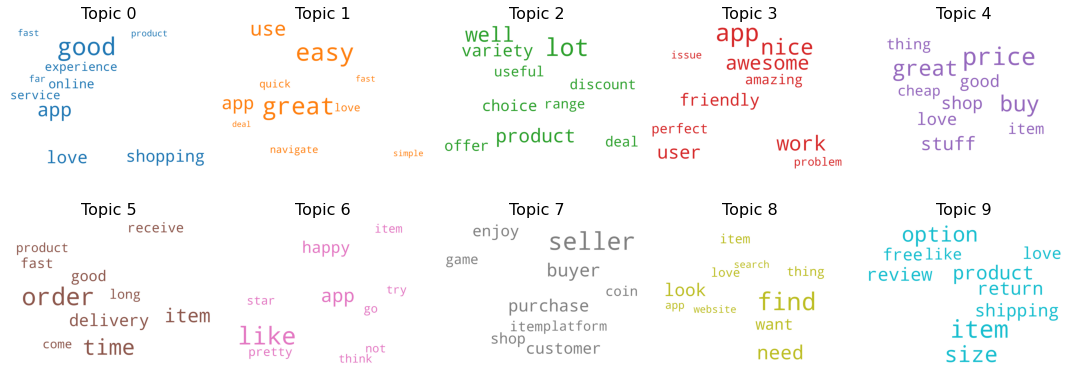

In [55]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(ncols=5, nrows = 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=-1)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Interpretation**
- From the Wordcloud, the following topics can be interpretated:
  - Topic 1: Convenient App
  - Topic 2: User Interface
  - Topic 3: Variety & Price
  - Topic 4: User Experience
  - Topic 5: Shopping Experience
  - Topic 6: Delivery
  - Topic 7: Consumer Satisfaction
  - Topic 8: In-App Actitives
  - Topic 9: Recommendations
  - Topic 10: Customer Service

## Topic Charting

In [56]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.201468 -0.129677       1        1  19.755842
1      0.323923  0.065707       2        1  13.552206
5     -0.079667 -0.202217       3        1  11.539952
4      0.124860 -0.203047       4        1  10.292344
7     -0.182384 -0.005765       5        1   8.422539
2     -0.119942  0.019345       6        1   8.168538
9     -0.170425 -0.082070       7        1   7.619170
3      0.105292  0.273256       8        1   7.205201
6     -0.123216  0.144833       9        1   6.789211
8     -0.079909  0.119636      10        1   6.654998, topic_info=      Term          Freq         Total Category  logprob  loglift
56    easy   7944.000000   7944.000000  Default  30.0000  30.0000
27   great   9760.000000   9760.000000  Default  29.0000  29.0000
0     good  10921.000000  10921.000000  Default  28.0000  28.0000
166    use   5162.000000   5162.000000  Default  27.0000  27.0000
26     app  12245.000000  12245.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
37    love    440.783882   6794.611273  Topic10  -3.6447  -0.0255
26     app    338.639373  12245.066141  Topic10  -3.9083  -0.8781
66    know    110.704826    486.470387  Topic10  -5.0264   1.2295
23     buy    114.600024   2547.382255  Topic10  -4.9918  -0.3916
95    like    102.908885   2063.151729  Topic10  -5.0994  -0.2883

[589 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2817     10  0.984514  ability
184       5  0.341512     able
184       7  0.144259     able
184       9  0.070658     able
184      10  0.438666     able
...     ...       ...      ...
71        6  0.127714     year
71        7  0.013849     year
71        8  0.300051     year
71        9  0.140024     year
670       9  0.974285       yr

[969 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 6, 5, 8, 3, 10, 4, 7, 9])

## Insert Topic Name into Data

In [57]:
df_positive_topic['Dominant_Topic'] = df_positive_topic['Dominant_Topic'].map({0: 'Convenient App',
                                                                               1: 'User Interface',
                                                                               2: 'Variety & Price',
                                                                               3: 'User Experience',
                                                                               4: 'Shopping Experience',
                                                                               5: 'Delivery',
                                                                               6: 'Consumer Satisfaction',
                                                                               7: 'In-App Actitives',
                                                                               8: 'Recommendations',
                                                                               9: 'Customer Service'
                                                                               })
df_positive_topic['Dominant_Topic'].head()

0                 Delivery
1           Convenient App
2    Consumer Satisfaction
3          Variety & Price
4                 Delivery
Name: Dominant_Topic, dtype: object

# Topic Modeling for below average ratings (1 - 3 ratings )

## Converting to List

In [58]:
data = df[df['rating'] <= 3].clean_content.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['stupid', 'shoppee', 'bubble', 'game', 'impossible', 'tap', 'bubble', 'change', 'colour', 'shoot', 'stupid', 'shoppee', 'recommend', 'star']]


In [59]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=5) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words],min_count = 3, threshold=5)  
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['stupid', 'shoppee', 'bubble_game', 'impossible', 'tap', 'bubble', 'change', 'colour', 'shoot', 'stupid', 'shoppee', 'recommend', 'star']


In [60]:
# Form Bigrams and Trigrams
data_words_bigrams = make_bigrams(data_words)
data_words_trigrams= make_trigrams(data_words_bigrams)
data_words_trigrams[0]

['stupid',
 'shoppee',
 'bubble_game',
 'impossible',
 'tap',
 'bubble',
 'change',
 'colour',
 'shoot',
 'stupid',
 'shoppee',
 'recommend',
 'star']

## LDA Modelling

In [61]:
# Create Dictionary
id2word = corpora.Dictionary(data_words_trigrams)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_words]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10, 
                                            random_state=42,
                                            chunksize = 10000,
                                            iterations = 50,
                                            passes = 10,
                                            decay = 0.8,
                                            alpha = 'asymmetric')

pprint(lda_model.print_topics())

[(0,
  '0.029*"app" + 0.027*"account" + 0.012*"time" + 0.011*"use" + 0.010*"try" + '
  '0.010*"email" + 0.009*"bad" + 0.008*"card" + 0.008*"customer" + '
  '0.008*"service"'),
 (1,
  '0.056*"seller" + 0.019*"buyer" + 0.011*"product" + 0.010*"platform" + '
  '0.010*"scammer" + 0.009*"way" + 0.007*"buy" + 0.007*"good" + 0.007*"item" + '
  '0.007*"well"'),
 (2,
  '0.035*"app" + 0.026*"search" + 0.017*"item" + 0.016*"like" + '
  '0.016*"product" + 0.014*"price" + 0.011*"look" + 0.010*"find" + 0.010*"use" '
  '+ 0.009*"good"'),
 (3,
  '0.081*"order" + 0.024*"time" + 0.021*"wait" + 0.021*"money" + 0.020*"month" '
  '+ 0.019*"get" + 0.018*"pay" + 0.016*"product" + 0.013*"take" + 0.013*"app"'),
 (4,
  '0.027*"service" + 0.026*"good" + 0.025*"customer" + 0.025*"shipping" + '
  '0.022*"not" + 0.022*"delivery" + 0.017*"app" + 0.015*"item" + 0.014*"bad" + '
  '0.012*"order"'),
 (5,
  '0.047*"product" + 0.026*"money" + 0.026*"fake" + 0.023*"app" + 0.023*"buy" '
  '+ 0.020*"bad" + 0.019*"order" + 0.

## Categorizing sorted Data

In [62]:
df_topic_negative_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_words)

# Format
df_negative_topic = df_topic_negative_keywords.reset_index()
df_negative_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_negative_topic['Document_No'] = df[df['rating'] <= 3].index
df_negative_topic.head(10)

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0           12             2.0              0.8038   
1           41             2.0              0.6415   
2           70             0.0              0.5188   
3          124             1.0              0.4465   
4          141             8.0              0.3760   
5          142             6.0              0.7605   
6          153             2.0              0.7538   
7          176             6.0              0.8664   
8          180             6.0              0.8135   
9          212             1.0              0.4016   

                                            Keywords  \
0  app, search, item, like, product, price, look,...   
1  app, search, item, like, product, price, look,...   
2  app, account, time, use, try, email, bad, card...   
3  seller, buyer, product, platform, scammer, way...   
4  refund, item, seller, customer, order, money, ...   
5  app, update, work, fix, load, try, time, phone...   
6  app, search, item, like, product, price, look,...   
7  app, update, work, fix, load, try, time, phone...   
8  app, update, work, fix, load, try, time, phone...   
9  seller, buyer, product, platform, scammer, way...   

                                                Text  
0  [stupid, shoppee, bubble, game, impossible, ta...  
1  [recent, update, shoppe, bubble, game, unplaya...  
2  [ok, app, come, contact, live, chat, rep, soph...  
3  [aware, manage, beat, claim, certain, voucher,...  
4  [delete, app, account, receive, defective, ite...  
5  [team, hopeless, usual, send, life, friend, bu...  
6  [hi, hard, shoot, bubble, play, bubble, pron, ...  
7    [force, close, time, hope, improvement, update]  
8                          [dumb, app, login, issue]  
9  [poor, customer, service, return, policy, favo...

In [63]:
#Looking for examples of text for topics generated
negative = pd.DataFrame(df_negative_topic[df_negative_topic['Dominant_Topic'] == 0][:2], columns = df_negative_topic.columns)

for i in range(1,10):
    negative = negative.append(df_negative_topic[df_negative_topic['Dominant_Topic'] == i][:2])
    

negative

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
2             70             0.0              0.5188   
12           291             0.0              0.9385   
3            124             1.0              0.4465   
9            212             1.0              0.4016   
0             12             2.0              0.8038   
1             41             2.0              0.6415   
33           522             3.0              0.5109   
38           548             3.0              0.4596   
35           540             4.0              0.5944   
39           549             4.0              0.4623   
16           346             5.0              0.5623   
26           450             5.0              0.6578   
5            142             6.0              0.7605   
7            176             6.0              0.8664   
20           387             7.0              0.5794   
42           568             7.0              0.5229   
4            141             8.0              0.3760   
13           292             8.0              0.3480   
147         1727             9.0              0.6527   
286         3620             9.0              0.6406   

                                              Keywords  \
2    app, account, time, use, try, email, bad, card...   
12   app, account, time, use, try, email, bad, card...   
3    seller, buyer, product, platform, scammer, way...   
9    seller, buyer, product, platform, scammer, way...   
0    app, search, item, like, product, price, look,...   
1    app, search, item, like, product, price, look,...   
33   order, time, wait, money, month, get, pay, pro...   
38   order, time, wait, money, month, get, pay, pro...   
35   service, good, customer, shipping, not, delive...   
39   service, good, customer, shipping, not, delive...   
16   product, money, fake, app, buy, bad, order, re...   
26   product, money, fake, app, buy, bad, order, re...   
5    app, update, work, fix, load, try, time, phone...   
7    app, update, work, fix, load, try, time, phone...   
20   item, order, receive, delivery, month, time, d...   
42   item, order, receive, delivery, month, time, d...   
4    refund, item, seller, customer, order, money, ...   
13   refund, item, seller, customer, order, money, ...   
147  listing, sell, item, list, user, post, pay, bu...   
286  listing, sell, item, list, user, post, pay, bu...   

                                                  Text  
2    [ok, app, come, contact, live, chat, rep, soph...  
12   [useless, app, keep, say, number, register, ch...  
3    [aware, manage, beat, claim, certain, voucher,...  
9    [poor, customer, service, return, policy, favo...  
0    [stupid, shoppee, bubble, game, impossible, ta...  
1    [recent, update, shoppe, bubble, game, unplaya...  
33   [transfer, extra, money, shopeepay, acct, allo...  
38   [preclaimed, babk, voucher, hide, agenda, spen...  
35   [love, fast, delivery, poor, management, deal,...  
39   [offer, like, app, trust, delivery, guy, appoi...  
16   [good, online, shop, bfore, be, try, payment, ...  
26   [lousy, good, return, ask, way, carry, popstat...  
5    [team, hopeless, usual, send, life, friend, bu...  
7      [force, close, time, hope, improvement, update]  
20   [fast, shipment, delivery, service, doorstep, ...  
42   [receive, push, notification, set, receive, no...  
4    [delete, app, account, receive, defective, ite...  
13   [customer, service, operator, fazrin, helpful,...  
147  [buy, item, item, buy, blender, cost, worth, b...  
286  [photo, item, want, buy, load, load, preview, ...

## WordCloud Visualization

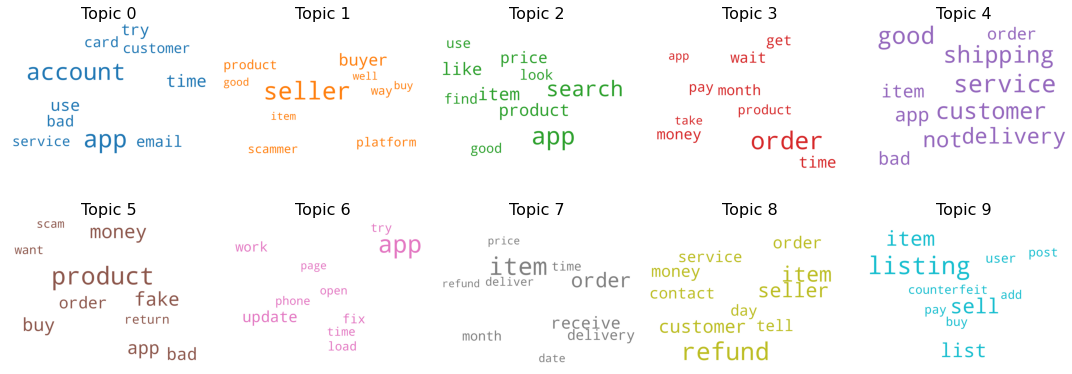

In [64]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(ncols=5,nrows = 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=-1)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

**Interpretation**
- From the Wordcloud, the following topics can be interpretated:
  - Topic 1: Account Issues
  - Topic 2: Poor Seller Feedback
  - Topic 3: Poor In-app Events 
  - Topic 4: Payment Issue
  - Topic 5: Poor Customer Service
  - Topic 6: Product Issue
  - Topic 7: App Issues
  - Topic 8: Delivery Issue
  - Topic 9: Refund
  - Topic 10: Product Listing Issues

## Topic Charting

In [65]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.061013 -0.072702       1        1  20.550410
2     -0.121036 -0.025037       2        1  13.379861
6     -0.183870 -0.165370       3        1  13.349111
8      0.156873 -0.004406       4        1  10.753358
7      0.119715  0.013166       5        1   9.159474
3      0.132917 -0.028278       6        1   9.074847
4      0.086173 -0.002670       7        1   8.791175
1     -0.003165  0.037447       8        1   6.753719
5      0.062887  0.048788       9        1   5.002468
9     -0.189481  0.199062      10        1   3.185576, topic_info=        Term         Freq        Total Category  logprob  loglift
343    order  3205.000000  3205.000000  Default  30.0000  30.0000
92      item  3281.000000  3281.000000  Default  29.0000  29.0000
30       app  5399.000000  5399.000000  Default  28.0000  28.0000
102   seller  1445.000000  1445.000000  Default  27.0000  27.0000
167  product  1536.000000  1536.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
914     year    30.365571   393.687653  Topic10  -5.2516   0.8843
30       app    48.451679  5399.112229  Topic10  -4.7843  -1.2669
68        go    32.242390   721.951134  Topic10  -5.1916   0.3379
317    thing    30.365110   844.036637  Topic10  -5.2516   0.1216
518       ad    26.993513   272.135912  Topic10  -5.3693   1.1358

[786 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
3170      1  0.944078     acc
615       1  0.745702  access
615       2  0.014480  access
615       3  0.159276  access
615       7  0.036199  access
...     ...       ...     ...
6644      5  0.112835     you
6644      6  0.056417     you
6644      8  0.789843     you
3551      1  0.963620   young
2441      5  0.843952     zip

[2382 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 7, 9, 8, 4, 5, 2, 6, 10])

## Insert Topic Name into Data

In [66]:
df_negative_topic['Dominant_Topic'] = df_negative_topic['Dominant_Topic'].map({0: 'Account Issues',
                                                                               1: 'Poor Seller Feedback',
                                                                               2: 'Poor In-app Events',
                                                                               3: 'Payment Issue',
                                                                               4: 'Poor Customer Service',
                                                                               5: 'Product Issue',
                                                                               6: 'App Issues',
                                                                               7: 'Delivery Issues',
                                                                               8: 'Refund',
                                                                               9: 'Product Listing Issues'
                                                                               })
df_negative_topic['Dominant_Topic'].head()

0      Poor In-app Events
1      Poor In-app Events
2          Account Issues
3    Poor Seller Feedback
4                  Refund
Name: Dominant_Topic, dtype: object

## Combining topic category with df

In [67]:
topics_df = pd.concat([df_positive_topic, df_negative_topic], ignore_index = True).set_index('Document_No').sort_index()

In [68]:
topics_df.shape

(57486, 4)

In [69]:
df['category'] = topics_df['Dominant_Topic']

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57486 entries, 0 to 77661
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   rating          57486 non-null  int64         
 1   date            57486 non-null  datetime64[ns]
 2   app             57486 non-null  object        
 3   store           57486 non-null  object        
 4   review          57486 non-null  object        
 5   clean_content   57486 non-null  object        
 6   adj             47679 non-null  object        
 7   noun            47157 non-null  object        
 8   verb            39582 non-null  object        
 9   emoji           3754 non-null   object        
 10  neg_score       57486 non-null  float64       
 11  neu_score       57486 non-null  float64       
 12  pos_score       57486 non-null  float64       
 13  compound_score  57486 non-null  float64       
 14  language        57486 non-null  object        
 15  mo

# EDA for LDA Topics

## Distribution Across Topics

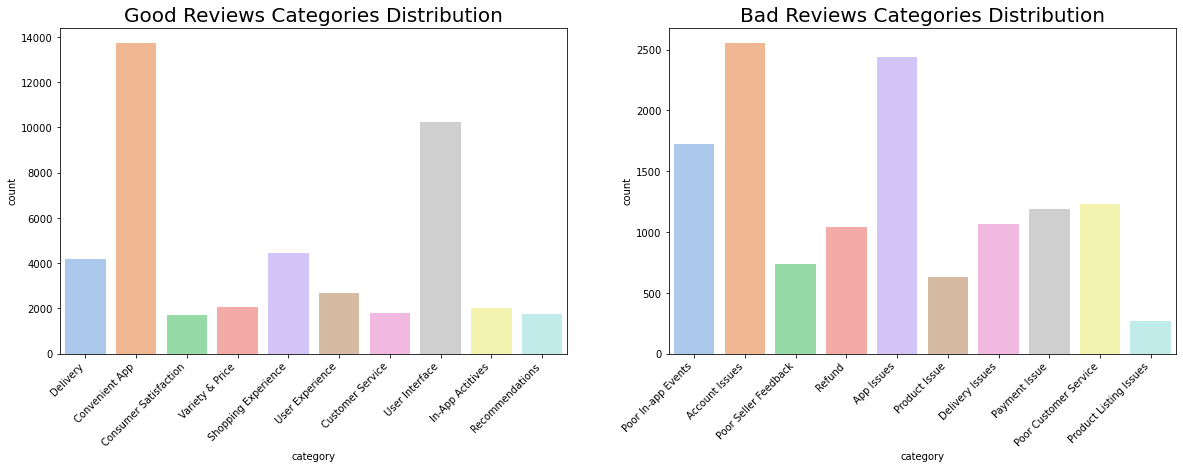

In [71]:
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.countplot(x = 'category', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha= 'right')
ax[0].set_title('Good Reviews Categories Distribution', fontsize = 20)
sns.countplot(x = 'category', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha= 'right')
ax[1].set_title('Bad Reviews Categories Distribution', fontsize = 20);

**Remarks**
- Good Reviews are mostly on Convenient App and User Interface
- Bad reviews are mostly on User Interface, App Issues and Purchase Experience

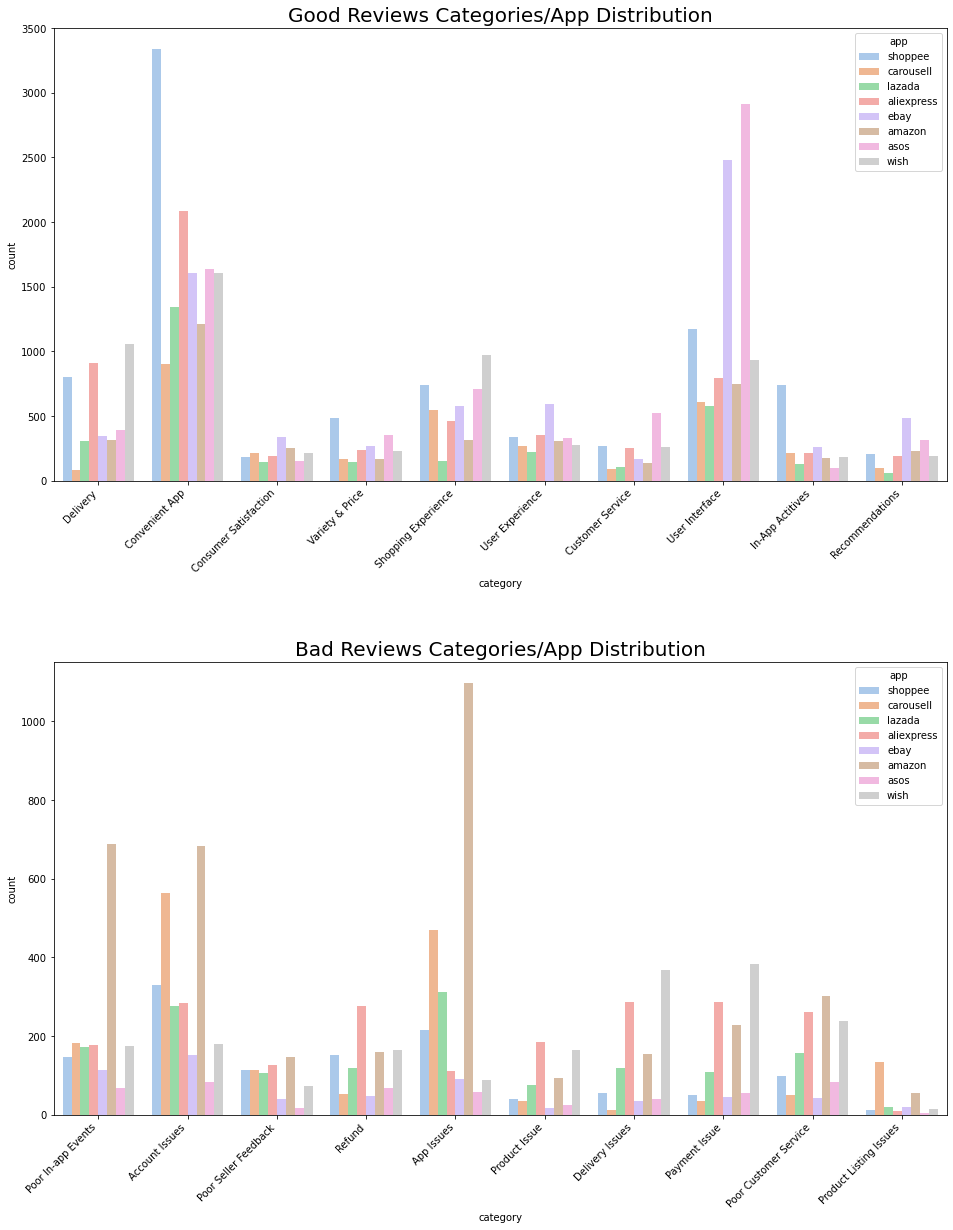

In [72]:
fig, ax = plt.subplots(2,1, figsize = (16, 20))
plt.subplots_adjust(hspace = 0.4)
sns.countplot(x = 'category', hue = 'app', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_title('Good Reviews Categories/App Distribution', fontsize = 20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha= 'right')

sns.countplot(x = 'category', hue = 'app', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_title('Bad Reviews Categories/App Distribution', fontsize = 20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45,  ha= 'right');

**Remarks**
- Amazon seems to take the lead in having more bad reviews as compared to the other apps, especially App Issues and In-app events
- Wish has slightly higher negative Purchase Experience reviews
- AliExpress has High Refund issues. 
- Shoppee takes the lead in Convenient app while ASOS takes the lead for User Interface

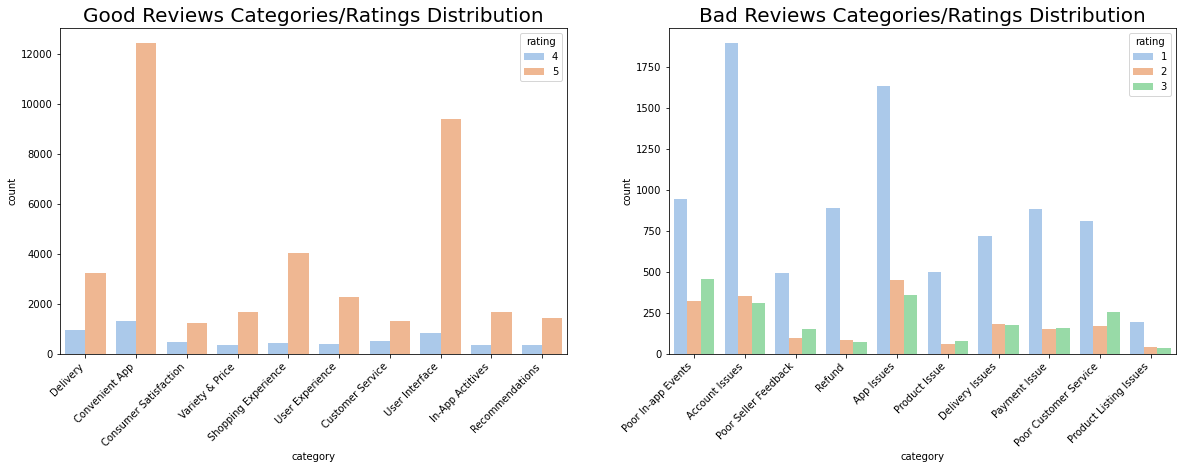

In [73]:
fig, ax = plt.subplots(1,2, figsize = (20, 6))
sns.countplot(x = 'category', hue = 'rating', data = df[df['rating'] > 3], order = df.category.unique().sort(), ax = ax[0])
ax[0].set_title('Good Reviews Categories/Ratings Distribution', fontsize = 20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha= 'right')

sns.countplot(x = 'category', hue = 'rating', data = df[df['rating'] <= 3], order = df.category.unique().sort(), ax = ax[1])
ax[1].set_title('Bad Reviews Categories/Ratings Distribution', fontsize = 20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha= 'right');

**Remarks**
- Users the wants to give a bad review will tend to just give a 1 rating
- Users that wants to give a good review will tend to just give a 5 rating

## Distribution of Rating for Month and Week

In [74]:
def plot_countplots_time_cat(df, date_features, scoring):
    nrows = int(np.ceil(len(date_features)))
    fig,ax = plt.subplots(nrows,1, figsize = (15, 6*nrows))
    
    for i in range(len(date_features)):
        ax[i].set_title(f'Count of {date_features[i]} across Shopping reviews {scoring}', fontdict = {'fontsize': 20})
        g = sns.countplot(x = date_features[i] , data = df, ax=ax[i], color = 'grey')
        g2 = g.twinx()
        
        g2 = sns.pointplot(x = date_features[i],
                           y = scoring,
                           hue = 'category',
                           data = df,
                           errwidth = 0,
                           ax=g2)
        
        plt.legend()
    plt.show()

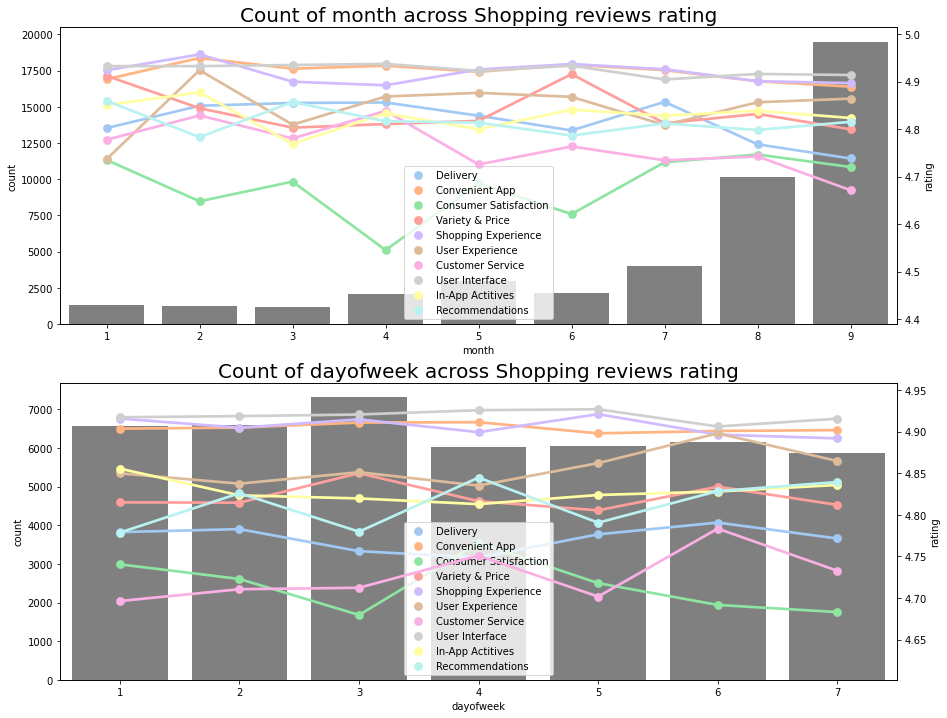

In [75]:
plot_countplots_time_cat(df[df['rating'] >3] , ['month', 'dayofweek'], 'rating')

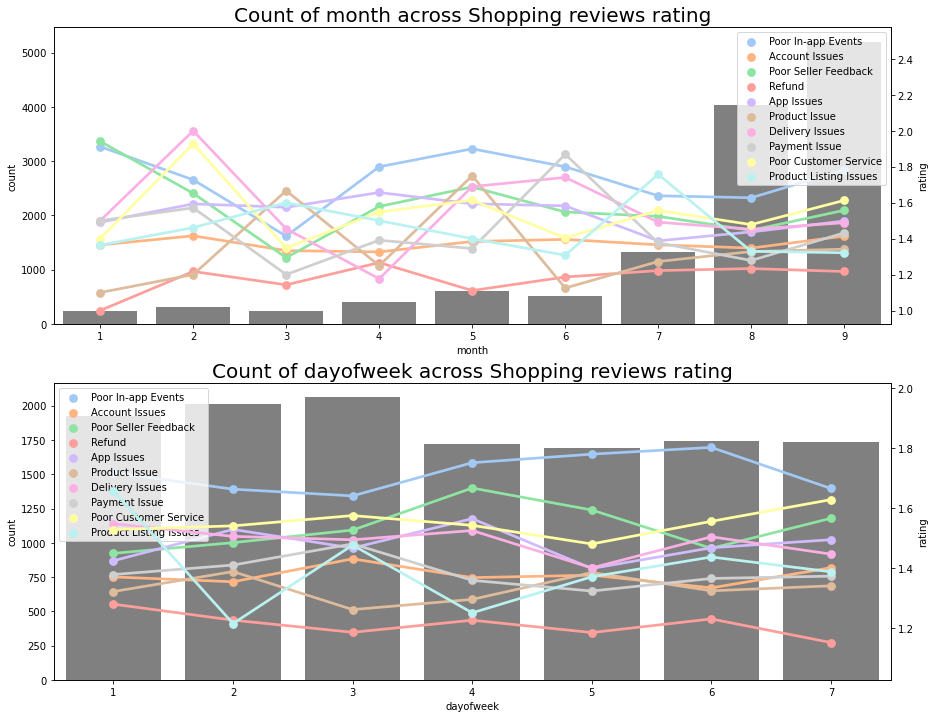

In [76]:
plot_countplots_time_cat(df[df['rating'] <= 3] , ['month', 'dayofweek'], 'rating')

## Distribution of Compound Score for Month and Week

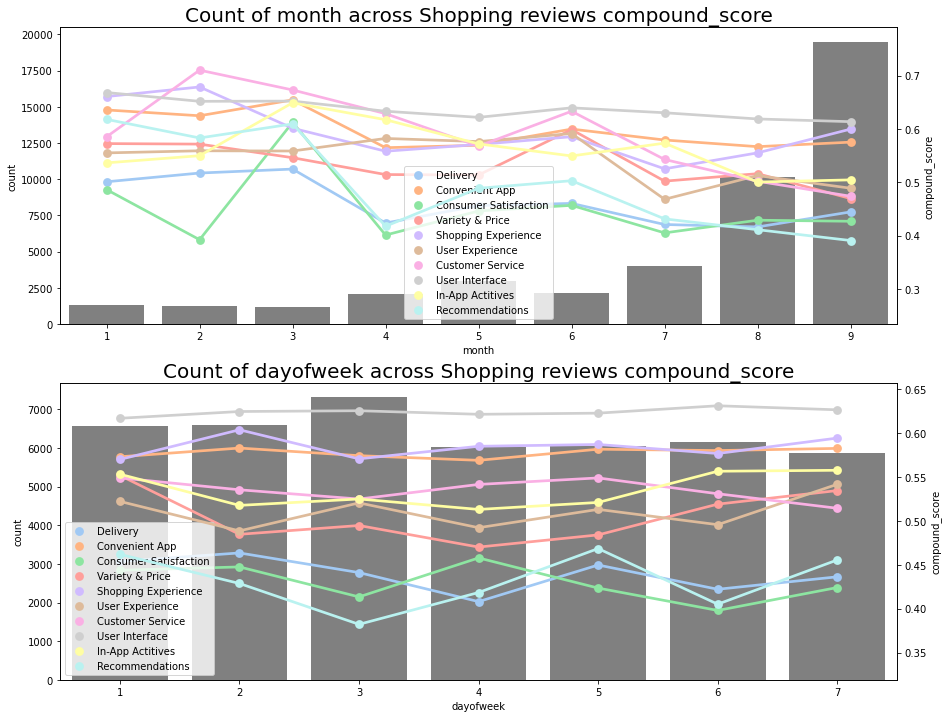

In [77]:
plot_countplots_time_cat(df[df['rating'] > 3] , ['month', 'dayofweek'], 'compound_score')

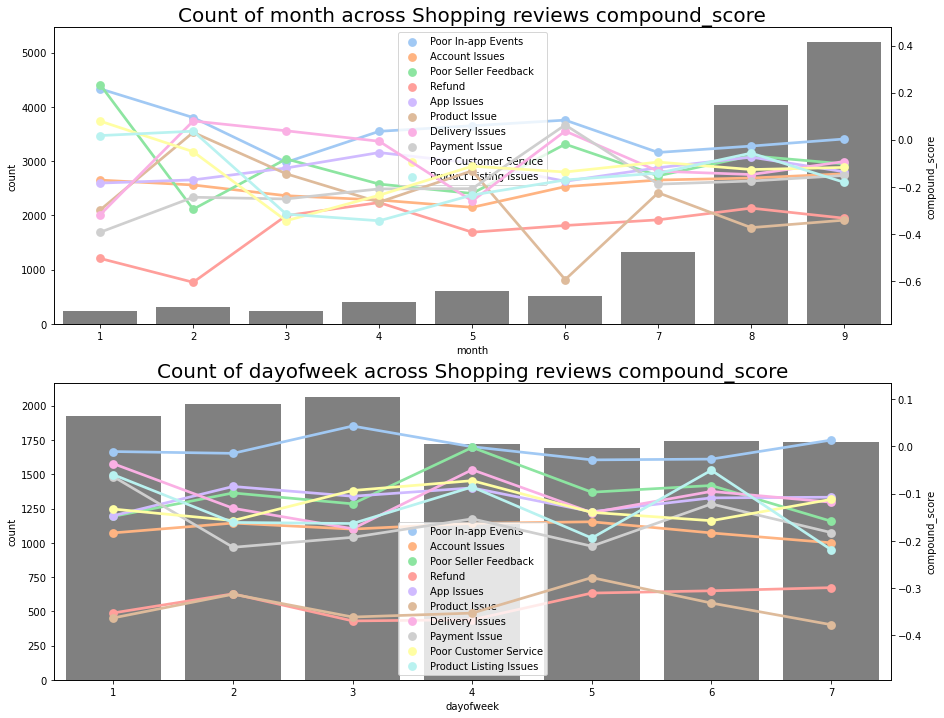

In [78]:
plot_countplots_time_cat(df[df['rating'] <= 3] , ['month', 'dayofweek'], 'compound_score')

**Remarks**
- Delivery seems to have a dip in rating from March to April.
- Refund is consistently low for Negative Reviews
- Base on compound scores, Delivery and Product tend to be very low as compared to other categories.

# Exporting Data for Modelling

In [79]:
df.to_csv('../data/reviews_Model.csv', index=None, header=True)